In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import seaborn as sns 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, Input 
from tensorflow.keras.utils import to_categorical 
%matplotlib inline 
import numpy as np
import pandas as pd
sns.set(style = 'white', context = 'notebook', palette = 'deep')
np.random.seed(42)

In [ ]:
train = pd.read_csv("/content/gdrive/MyDrive/Image Denoising DS/train.csv")
#/content/gdrive/MyDrive/Image Denoising DS/train.csv
#test = pd.read_csv("/content/gdrive/MyDrive/Image Denoising DS/test.csv")
#/content/gdrive/MyDrive/Image Denoising DS/test.csv

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = train["label"]
x_train = train.drop(labels = ["label"], axis = 1)
#y_train.value_counts()
#graph = sns.countplot(y_train)

In [ ]:
print(type(x_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
x_train=x_train.to_numpy()
y_train=y_train.to_numpy()

print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
x_train = x_train.astype('float')/255
#x_train

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)
#y_val

In [ ]:
x_train_size = len(x_train)
x_val_size = len(x_val)
print(x_train_size)
print(x_val_size)

33600
8400


In [ ]:
x_train_noisy = x_train + np.random.rand(x_train_size, 784) * 1.1
x_val_noisy = x_val + np.random.rand(x_val_size, 784) * 1.1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)#clipping the noise under 0 and 1
x_val_noisy = np.clip(x_val_noisy, 0., 1.)#clipping the noise under 0 and 1

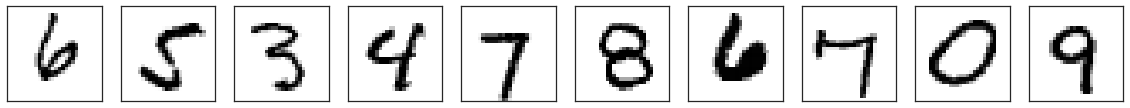

In [ ]:
def plot(x, p , labels = False):
    plt.figure(figsize = (20,2))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(x[i].reshape(28,28), cmap = 'binary')
        plt.xticks([])
        plt.yticks([])
        if labels:
            plt.xlabel(np.argmax(p[i]))
    plt.show()
    return
plot(x_train, None)

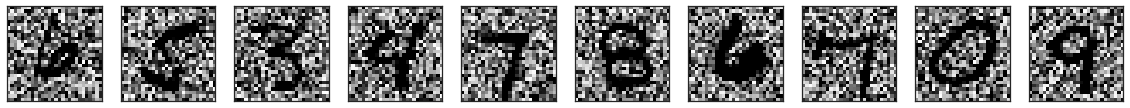

In [ ]:
plot(x_train_noisy, None)

In [ ]:
classifier = Sequential([
    Dense(512, activation = 'relu', input_shape = (784, )),
    Dense(512, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

classifier.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [ ]:
classifier.fit(x_train, y_train, epochs = 10, batch_size = 512)

Epoch 1/10
66/66 [==============================] - 3s 43ms/step - loss: 0.4478 - accuracy: 0.8732
Epoch 2/10
66/66 [==============================] - 3s 43ms/step - loss: 0.1397 - accuracy: 0.9579
Epoch 3/10
66/66 [==============================] - 3s 44ms/step - loss: 0.0871 - accuracy: 0.9738
Epoch 4/10
66/66 [==============================] - 3s 43ms/step - loss: 0.0599 - accuracy: 0.9822
Epoch 5/10
66/66 [==============================] - 3s 42ms/step - loss: 0.0414 - accuracy: 0.9873
Epoch 6/10
66/66 [==============================] - 3s 42ms/step - loss: 0.0306 - accuracy: 0.9910
Epoch 7/10
66/66 [==============================] - 3s 42ms/step - loss: 0.0189 - accuracy: 0.9948
Epoch 8/10
66/66 [==============================] - 3s 42ms/step - loss: 0.0167 - accuracy: 0.9946
Epoch 9/10
66/66 [==============================] - 3s 42ms/step - loss: 0.0118 - accuracy: 0.9969
Epoch 10/10
66/66 [==============================] - 3s 43ms/step - loss: 0.0081 - accuracy: 0.9977


In [ ]:
loss, acc = classifier.evaluate(x_val, y_val)

263/263 [==============================] - 1s 3ms/step - loss: 0.1045 - accuracy: 0.9720


In [ ]:
loss, acc = classifier.evaluate(x_val_noisy, y_val)

263/263 [==============================] - 1s 3ms/step - loss: 17.4326 - accuracy: 0.1856


In [ ]:
input_image = Input(shape = (784, ) )

encoded = Dense(784, activation = 'relu')(input_image)#e1
encoded = Dense(256, activation = 'relu')(encoded)#e2

encoded = Dense(64,  activation = 'relu')(encoded)#bottle

decoded = Dense(256, activation = 'relu')(encoded)#d1
decoded = Dense(784, activation = 'sigmoid')(decoded)#d2

autoencoder = Model(input_image, decoded)
autoencoder.compile(loss= 'binary_crossentropy' , optimizer = 'adam')
autoencoder.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_44 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_45 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_46 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_47 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_48 (Dense)             (None, 784)               201488    
Total params: 1,050,976
Trainable params: 1,050,976
Non-trainable params: 0
____________________________________________

In [ ]:
from tensorflow.keras.callbacks import LambdaCallback

autoencoder.fit(x_train_noisy, x_train,
               epochs = 100, batch_size = 512,
               validation_split = 0.2, verbose = False,
               callbacks=[LambdaCallback(on_epoch_end=lambda e,l: print('{:.3f}'.format(l['val_loss']), end=' _ '))]
               )

print("\nTraining has finished !")

0.258 _ 0.235 _ 0.211 _ 0.189 _ 0.182 _ 0.174 _ 0.169 _ 0.164 _ 0.161 _ 0.158 _ 0.157 _ 0.154 _ 0.152 _ 0.151 _ 0.150 _ 0.147 _ 0.146 _ 0.144 _ 0.143 _ 0.142 _ 0.142 _ 0.140 _ 0.139 _ 0.138 _ 0.138 _ 0.136 _ 0.136 _ 0.135 _ 0.134 _ 0.133 _ 0.133 _ 0.132 _ 0.131 _ 0.131 _ 0.130 _ 0.130 _ 0.130 _ 0.129 _ 0.129 _ 0.128 _ 0.127 _ 0.127 _ 0.127 _ 0.127 _ 0.127 _ 0.126 _ 0.126 _ 0.126 _ 0.126 _ 0.125 _ 0.125 _ 0.125 _ 0.124 _ 0.124 _ 0.124 _ 0.124 _ 0.123 _ 0.124 _ 0.123 _ 0.123 _ 0.123 _ 0.123 _ 0.123 _ 0.122 _ 0.122 _ 0.122 _ 0.122 _ 0.122 _ 0.121 _ 0.121 _ 0.121 _ 0.121 _ 0.120 _ 0.120 _ 0.120 _ 0.120 _ 0.121 _ 0.120 _ 0.120 _ 0.120 _ 0.120 _ 0.120 _ 0.120 _ 0.120 _ 0.119 _ 0.119 _ 0.119 _ 0.119 _ 0.120 _ 0.119 _ 0.119 _ 0.119 _ 0.119 _ 0.119 _ 0.118 _ 0.119 _ 0.119 _ 0.118 _ 0.118 _ 0.119 _ 
Training has finished !


In [ ]:
preds = autoencoder.predict(x_val_noisy)

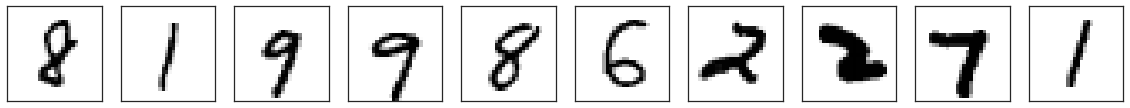

In [ ]:
plot(x_val, None)


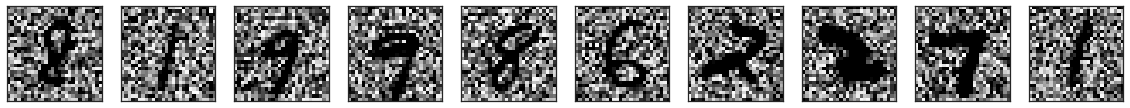

In [ ]:
plot(x_val_noisy, None)


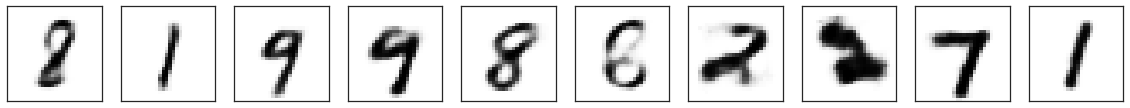

In [ ]:
plot(preds, None)


In [ ]:
loss, acc = classifier.evaluate(preds, y_val)
print(f"Loss : {loss} \nAccuracy : {acc}")
#enough

263/263 [==============================] - 1s 3ms/step - loss: 0.3226 - accuracy: 0.9295
Loss : 0.3226493299007416 
Accuracy : 0.9295238256454468
